# **Previsão de Doenças Cardiovasculares**
## Contexto:
- As doenças cardiovasculares (cardio = coração; vasculares = vasos sanguíneos)
     afetam o sistema circulatório, ou seja, o coração e os vasos sanguíneos (artérias,
    veias e vasos capilares)
    As doenças cardiovasculares (DCV) são de vários tipos, sendo as mais
    preocupantes a doença das artérias coronárias (artérias do coração) e a doença
    das artérias do cérebro. 
     Esse tipo de doença começa a surgir normalmente ao decorrer da idade, pessoas com vidas pouco saudadeveis que não tem um habito de se exercitar e comer bem tendem a ter esse tipo de problema, pois as pessoas ativas têm menos chances de terem doenças cardiovasculares.
---
 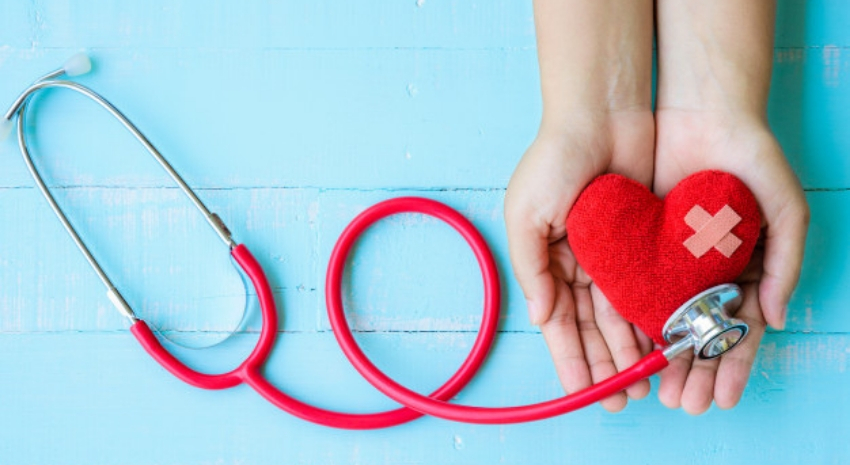
 
 
### Como a inteligencia artificial pode ajudar nessa luta?
- Estudos publicados na revista Nature Biomedical Engineering mostram que algoritmos de Deep Learning foram capazes de  antecipar doenças cardíacas em até 5 anos.
- Graças a esses estudos os Modelos de machine leaning estão cada vez mais precisos, e isso fornece mais confiança e dados para o medico conseguir o melhor diagnostisco e assim salvando mais vidas.
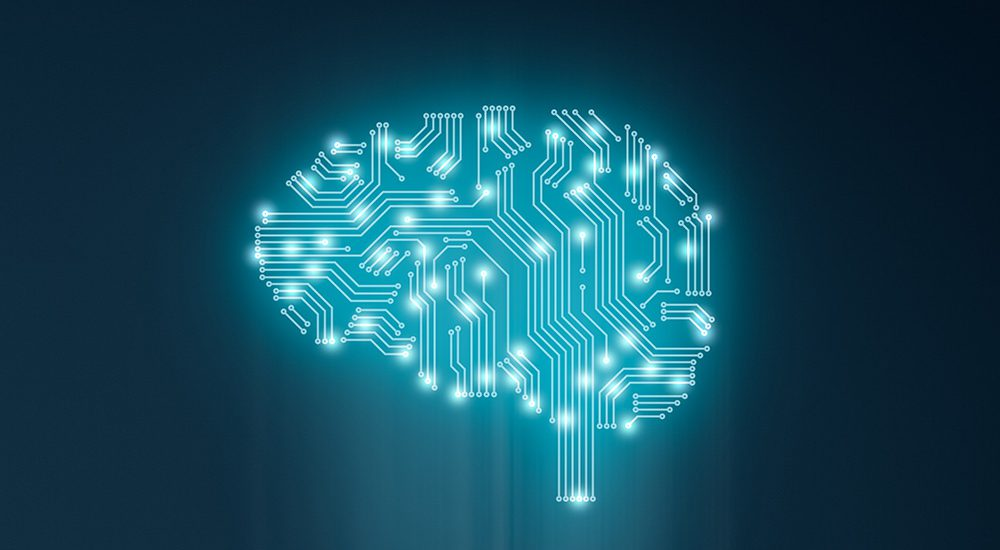
---
- Fonte de dados: Os dados estão vindos do site da UCI Machine leaning repository https://archive.ics.uci.edu/ml/datasets/heart+Disease, nele contem as bases de dados que vamos usar, a base deles original contem 76 linhas de atributos, porém a nossa e uma pre-processada que conta apenas com os 14 atributos mais importantes para o modelo, como são dados de machine leaning, pode ser que venham perfeito para o modelo mas vamos testar, como os dados e cabeçalhos estão de dados diferentes, eu criei um arquivo csv com os dados de cleveland para facilitar as coisas.

---

## Etapas do projeto: Qual sera a metodologia aplicada?
- Etapa 1: Importação das bibliotecas necessarias para realizar as analises, importar os modelos, e tudo que for necessario para  
- Etapa 2: Extração dos dados e ajustes nos dados caso for necessario.
- Etapa 3: Analise Exploratoria dos dados
- Etapa 4: Aplicação dos modelos de machine leaning
- Etapa 5: Escolher o melhor modelo e melhora-lo

---

### Etapa 1: Importação das bibliotecas necessarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

---

### Etapa 2: Extração dos dados e ajustes nos dados caso for necessario.

In [2]:
#Lendo a base de dados
df = pd.read_csv('cleveland_data.csv', index_col=0)

In [3]:
#Exibindo as primeiras entradas do Dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
#Exibindo os tipos dos dados e informações gerais do df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 35.5+ KB


- Vamos alterar o tipo de ca e thal pois são valores inteiros mas estão como objeto, vamos primeiro ver os itens que temos nessas colunas.

In [5]:
#Como podemos ver tem um valor incorreto, um "?" no meio dos meus texto, vou trocar ele pelo valor que mais aparece.
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [6]:
#Alterando o valor de ? para 0.0
df.loc[df['ca'] == '?', 'ca'] = 0.0
#Alterando o tipo para numero float
df['ca'] = df['ca'].astype(np.float32, copy=False)

In [7]:
#Verificando novamente
df['ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [8]:
#Verificando a coluna thal, tem o mesmo problema.
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
#Alterando o valor de ? para 3.0
df.loc[df['thal'] == '?', 'thal'] = 3.0
#Alterando o tipo para numero float
df['thal'] = df['thal'].astype(np.float32, copy=False)

In [10]:
#Verificando novamente
df['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [11]:
#Mudando o tipo de dados de Age e Sex pois são inteiros e estão como float

#Convertendo o tipo da variavel Age
df['age'] = df['age'].astype(int)

#Convertendo o tipo da variavel Sex
df['sex'] = df['sex'].astype(int)


In [12]:
#Verificando os tipos novamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int32  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float32
 12  thal      303 non-null    float32
 13  num       303 non-null    int64  
dtypes: float32(2), float64(9), int32(2), int64(1)
memory usage: 30.8 KB


In [13]:
#Exibindo os valores nulos, caso aja
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- Como podemos ver, como os dados vem de uma repositorio de machine learning eles não tem tantos erros ou valores ausentes que prejudicariam o modelo, porém analisando afundo as informaçõs sobre nossa base, descobrimos que a nossa variavel alvo "NUM" que contem 4 variaveis. nesse modelo eles só usam 2 (Que no caso seria 0 = Não e 1 = Sim) então vamos fazer essa substituição. 
- E descobrimos tambem, que havia valores errados nas colunas numericas e algumas colunas tambem estavam com o tipo errado.

In [14]:
#Valores antes de serem alterados
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [15]:
#Alterando os valores para 0 e 1(Sim e Não)
df.loc[df ['num'] != 0,'num'] = 1

In [16]:
#Novos valores
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

In [17]:
#Linhas e colunas do df
df.shape

(303, 14)

---
### E assim terminamos a primeira fase do projeto, ajuste das colunas e limpeza caso fosse necessario.
- Como comentei no inicio do projeto, como os dados vem de um repositorio eles não estavam tão sujos, porém tinham alguns erros ainda, isso mostra o por que dessa analise exploratoria e limpeza dos dados importa, para previnir erros futuros.
---

### Etapa 3: Analise Exploratoria dos dados

#### Dicionario das colunas
- age: idade em anos
- sex: Sexo (1 = Masculino; 0 = Feminino)
- cp:  tipo de dor no peito(1 - angina típica, 2=angina antipica, 3= dor não cardiaca e 4 = assitomática)
- trestbps: pressão arterial de repouso (em mm Hg na admissão ao hospital)
- chol: soro cholestoral em mg/dl
- fbs: (jejum de açúcar no sangue > 120 mg/dl) (1 = verdadeiro; 0 = falso)
- restecg: resultados eletrocardiográficos de repouso
- thalach: Frequência cardiaca máxima atingida
- exang: angina induzida por exercício (1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida pelo exercício relativo ao descanso
- slope: a inclinação do segmento ST exercício de pico
- ca: número de vasos principais (0-3) coloridos por flourosopy
- thal: 3 = normal; 6 = defeito fixo; 7 = defeito reversível
- num: diagnóstico de doença cardíaca (estado da doença angiográfica) (0 = Não tem doença cardiaca < 50% do estreitamento do diametro e 1,2,3,4 há doença cardiaca(>50% do estreitamento do diametro)

In [18]:
#informações estaticas do df
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938384,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


- Como podemos notar, pelo vsito não tem nenhum valor "fora da casinha" os valores estão bem inchutos e tratos já, entamos podemos seguir em frente pois não temos outliers

<AxesSubplot:>

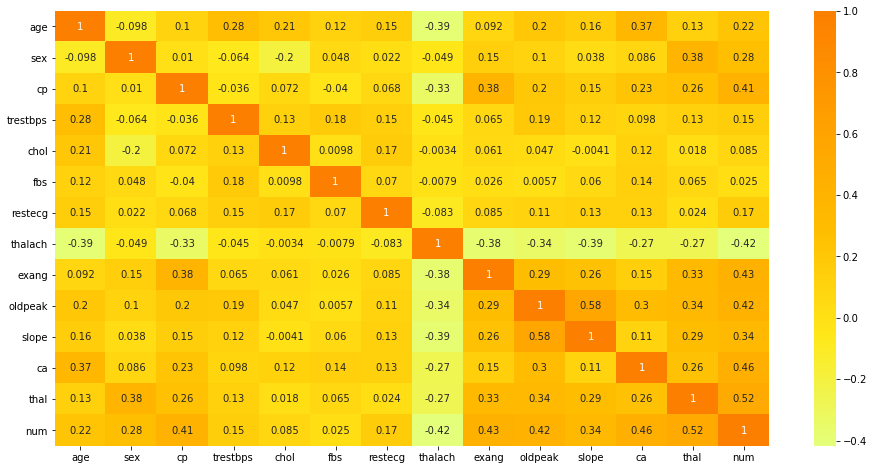

In [19]:
#Vendo as correlação das informações
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='Wistia', annot=True)

- Como podemos notar, não tem nada que esta extremamente correlacionado, ou seja, e parece que as variaveis estão bem distribuidas, menos claro a de thalach, mas isso e meu modelo que vai dizer no futuro eu vou fazer teste removendo ela para ver se vamos ter um impacto possitivo ou negativo depois de removela.

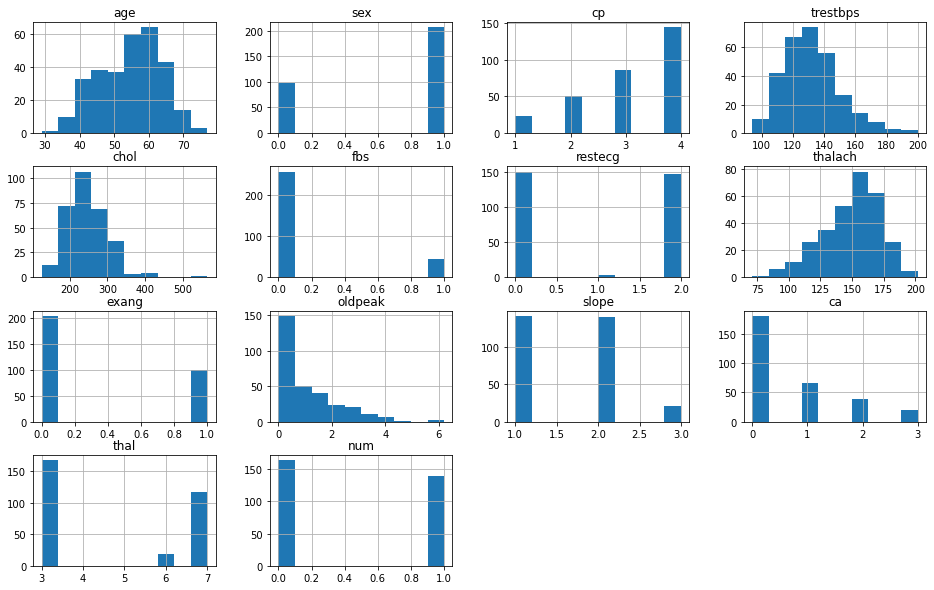

In [20]:
#Verificando a distribuição das variaveis
df.hist(figsize=(16,10));

- Como podemos notar as distribuição estão bem normais, temos picos em certos pontos como depois do 60 eu tenho mais dados, talvez por que as pessoas sofram a partir dessa idade, porém não e somente pessoas mais velhas, pois minha base com pessoas com 30 anos, ou seja, até os mais jovem estão sendo afetados.

#### Fazendo alguns graficos para visualizar melhor essa distribuição

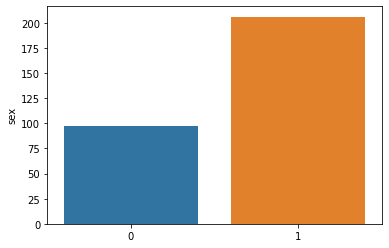

In [21]:
#Verificando a quantidade de homens e mulheres no df(0=Feminino e 1=Masculino)
sns.barplot(
    x=df['sex'].value_counts().index,
    y=df['sex'].value_counts()
);

- Como podemos notar a maioria das pessoas que participaram do exame foram homens, pois homens tem mais riscos de ter um ataque do coração porem as mulheres mais mortalidade, ou seja, elas tem menos chance de ter porém quando tem e mais mortal do que no homem.

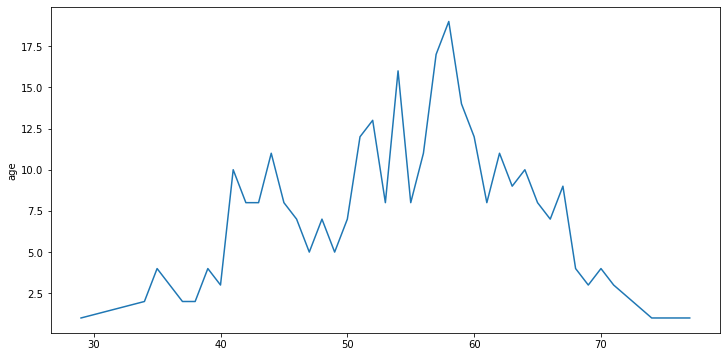

In [22]:
#Analise da idade que mais aparece nos dados
plt.figure(figsize=(12,6))
sns.lineplot(
    x=df['age'].value_counts().index,
    y=df['age'].value_counts(),
);

- Analisando o grafico vemos que a maioria das pessoas que participaram do exame, são pessoas entre 50 e 60 anos, acredito qeu seja nessa faixa etaria de idade que as pessoas tem os maiores riscos de sofrer alguma doença Cardiovascular, por isso um pico tão alto de valores de pessoas com essa idade.

---
### E fim da analise exploratoria
- Nessa etapa nos vemos alguns graficos para temos uma ideia geral, o objetivo dessa analise exploratoria e ver qual é, qual é a dos dados, para temos essa ideia geral e podemos realizar teste depois da aplicação do modelo, removendo algumas colunas que consideremos irrelevante para o modelo ou melhor, vamos deixar o modelo dizer qual coluna e irrelevante.
---

### Etapa 4: Aplicação dos modelos de Machine Learning

In [44]:
#Antes de tudo, vou criar uma função para avalisar o meu modelo, assim dimuimindo as linhas de codigo

def Avaliarmodelo(nome_modelo, y_test, previsao):
    cr = classification_report(y_test, previsao)
    cm = confusion_matrix(y_test, previsao)
    heatmap = plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True)
    return print(f'O Modelo {nome_modelo}\nRelatório de classificação: \n{cr}\nMatriz de Confusão: \n{heatmap}')

In [52]:
#Separando os dados entre X e Y, X são os dados que eu vou usar para chegar em Y

#Num e minha variavel alvo, e vou usar os dados de x para chegar nela
x = df.drop('num', axis=1)
#Variavel destino
y = df['num']

#Separando meu modelo entre dados de Treino e Teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

In [54]:
#Criando as instacias dos modelos
modelo_dc = DecisionTreeClassifier()
modelo_rf = RandomForestClassifier()
modelo_ex = ExtraTreeClassifier()

#Criando um dicionario para pecorrer todos os modelos e testa-los de uma vez

modelos = {
    'Decision Tree Classifier': modelo_dc,
    'Random Forest Classifier': modelo_rf,
    'Extra Tree Classifier': modelo_ex
}

O Modelo Decision Tree Classifier
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.77      0.79      0.78        38

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76

Matriz de Confusão: 
Figure(576x288)
O Modelo Random Forest Classifier
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.91      0.82      0.86        38

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

Matriz de Confusão: 
Figure(576x288)
O Modelo Extra Tree Classifier
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.78      0.

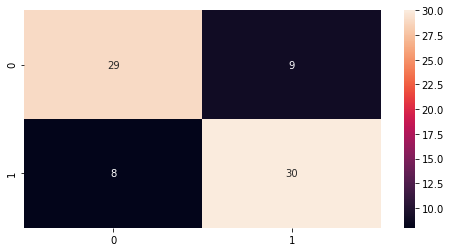

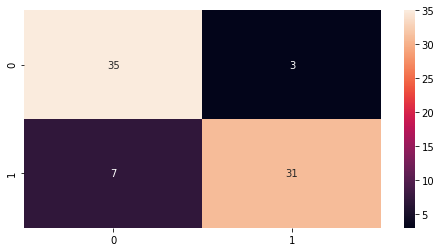

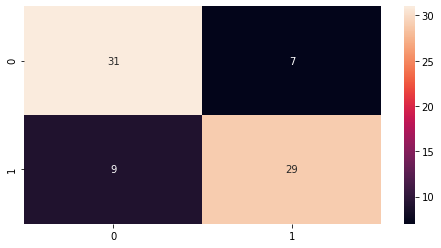

In [55]:
#Pecorrendo os modelos e treinando

for nome_modelo, Modelo in modelos.items():
    #Treinando os modelos
    Modelo.fit(x_train, y_train)
    
    #Fazendo previsão
    previsao = Modelo.predict(x_test)
    
    #avaliando
    Avaliarmodelo(nome_modelo,y_test, previsao)

### Como podemos analisar o modelo campeão e o modelo de Random Forest Classifier, ele teve a melhor precisão o melhor Recall e Melhor f-Score, e na Matrix de Confusão foi o que melhor acertou tambem.
Relatório de classificação: Explicação das metricas
- Precision: Precisão do modelo, diz respeito a quantidade (proporcional) de indentificações positivas feitas pelo modelo, que resumidamente e quanto ele conseguiu acertar.
- Accuracy: Acurácia: Mostra quantas previsões o modelo acertou em relção a todas que seriam possivel.
- Recall: Mostra a proporção de positivos encontrados corretamente
- f1-score: É a média harmonica entre a precisão e o recall.(Sendo o melhor valor 1, ou seja, quanto mais proximo de 1 melhor)
---
- Matrix de Confusão:
    - A matrix de confusão mostra quanto o meu modelo acertou em relação ao verdadeiro valor, ou seja, os valores dentro dos quadros pretos são os valores que eram por exemplo 0 e o meu modelo falou que era 1, ou seja, ele errou! e os valores em beji mostra os valores que eram 0 e meu modelo falou que era 0, ou seja, ele acertou!!!. Resumindo: São os acertos e erros do modelo relacinado com o valor verdadeiro.

---
### E assim terminamos a aplicação do modelo
- Nessa aplicações testamos 3 modelos de classificação para nos quem possivel teria uma doença cardiovascular ou não, o modelo com maior precisão foi o modelo de Random Forest com 83% de precisão então vamos partir para proxima etapa com esse modelo.
---

### Etapa 5: Escolher o melhor modelo e melhora-lo

- Salvando as informações do Random Forest para caso o modelo resetar eu saiba onde o modelo conseguiu acertar
O Modelo Random Forest Classifier
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.91      0.82      0.86        38

- accuracy                           0.87        76
- macro avg       0.87      0.87      0.87        76
- weighted avg       0.87      0.87      0.87        76

In [56]:
#Criando uma copia do Dataframe para podemos modifica-lo, e ver se conseguimos melhorar nosso modelo
Melhorar_modelo = df.copy()

In [59]:
#Entradas do Dataframe criado
Melhorar_modelo.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67,1,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


O Modelo Random Forest Classifier
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.92      0.87      0.89        38

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76

Matriz de Confusão: 
Figure(576x288)


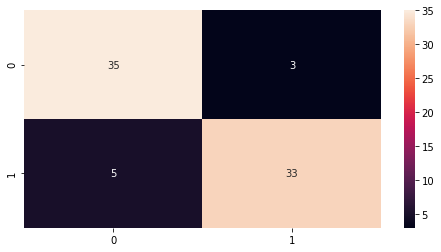

In [88]:
#Separando os dados entre X e Y
x = Melhorar_modelo.drop(['num','thalach'],axis=1)
y = Melhorar_modelo['num']

#Separando meu modelo entre dados de Treino e Teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

#Treinando meu modelo campeão.
modelo_rf.fit(x_train,y_train)

#Prevendo
previsao = modelo_rf.predict(x_test)

#avaliando
Avaliarmodelo('Random Forest Classifier',y_test, previsao)

- Como podemos notar, removendo a coluna de thalach: Frequência cardiaca máxima atingida, o meu modelo melhorou a precisão dele de 0.83 para 0.88, claro que não sou medico então não sei se essa coluna e realmente importante e mesmo que o modelo erre mais, essa coluna tem que está lá,então eu vou deixar o meu modelo sem ela, porém sem saber se está certo ou errado remover.

---
### E assim chegamos ao fim do nosso projeto.
#### Conclusão:
- Como podemos notar, para desenvolver um projeto desse mesmo com uma base semi-preparada, levou algum tempo pois precisamos indertificar o tipo dos dados, fazer graficos para termos uma ideia geral, etc... Para chegamos a conclusão de que Sim, a Ia pode sim ajudar os medicos, pois por exemplo com esse modelo que tem a precisão de 88% os medicos teriam mais segurança e dados para fazer o melhor diagnostico, e assim salvando mais vidas, sinto que o objetivo de desenvolver o projeto foi concluido com exito, e projetos assim e até melhores e claro podem salvar vidas e no futuro vão salvar, esse e só um pequeno passo para projetos mais completos que vão ajudar milhares de pessoas.

Obrigado.
    